## This script contains the following:

#### 1. Importing Libraries and Data
#### 2. Creating Subset of Data
#### 3. Creating Line chart
#### 4. Cleaning Time Series Data
#### 5. Time-series analysis: decomposition
#### 6. Stationarizing the World Happiness Score Data

In [2]:
# Import Libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [3]:
# Import Data set

path = r'/Users/neroshakrishna/Desktop/P/Learning/Data_Analysis/CareerFoundry/Data Immersion/Achievement_6/WorldHappiness'
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'merged_data.csv'), index_col = False)

In [4]:
df.head()

,Unnamed: 0,country,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,year
0,0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [7]:
# Removing column 'Unnamed: 0'

df = df.drop(columns = ['Unnamed: 0'])

In [8]:
df.head()

,country,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


## Creating Subset of Data

In [9]:
df_grouped_year = df.groupby('year').agg({'happiness_score':['mean']})

In [10]:
df_grouped_year

,happiness_score
,mean
year,
2015,5.375734
2016,5.382185
2017,5.354019
2018,5.375917
2019,5.407096


## Creating Line chart

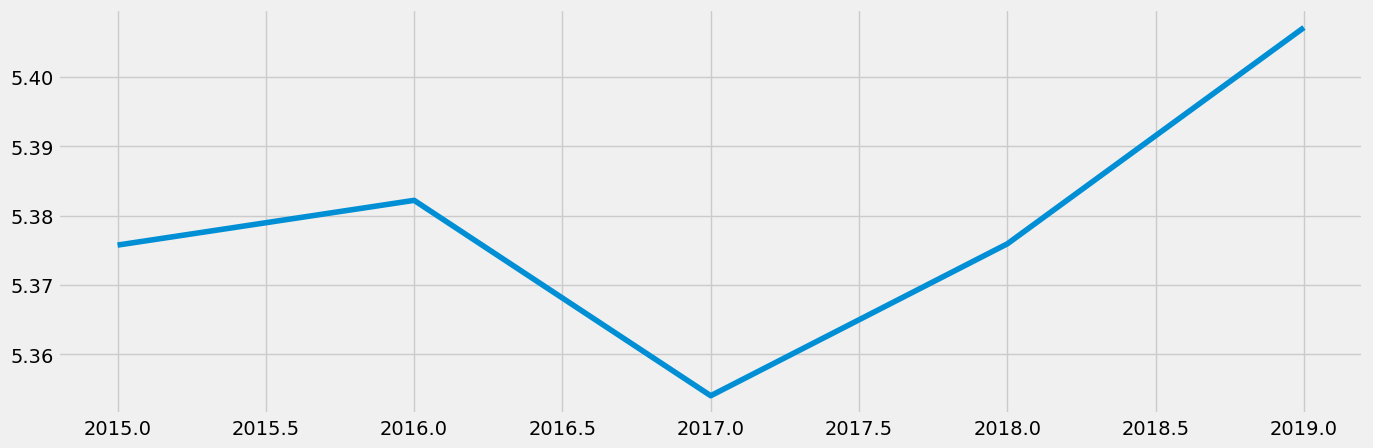

In [12]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df_grouped_year)

## Subsetting, Wrangling, and Cleaning Time Series Data

In [19]:
data_2 = df_grouped_year.reset_index()

In [ ]:
# Set the "year" column as the index

from datetime import datetime

data_2['datetime'] = pd.to_datetime(data_2['year'], format='%Y') # Create a datetime column from "year.""
data_2 = data_2.set_index('datetime') # Set the datetime as the index of the dataframe.
data_2.drop(['year'], axis=1, inplace=True) # Drop the "Date" column.
data_2.head()

In [48]:
data_2.head()

,happiness_score
,mean
year,
2015-01-01,5.375734
2016-01-01,5.382185
2017-01-01,5.354019
2018-01-01,5.375917
2019-01-01,5.407096


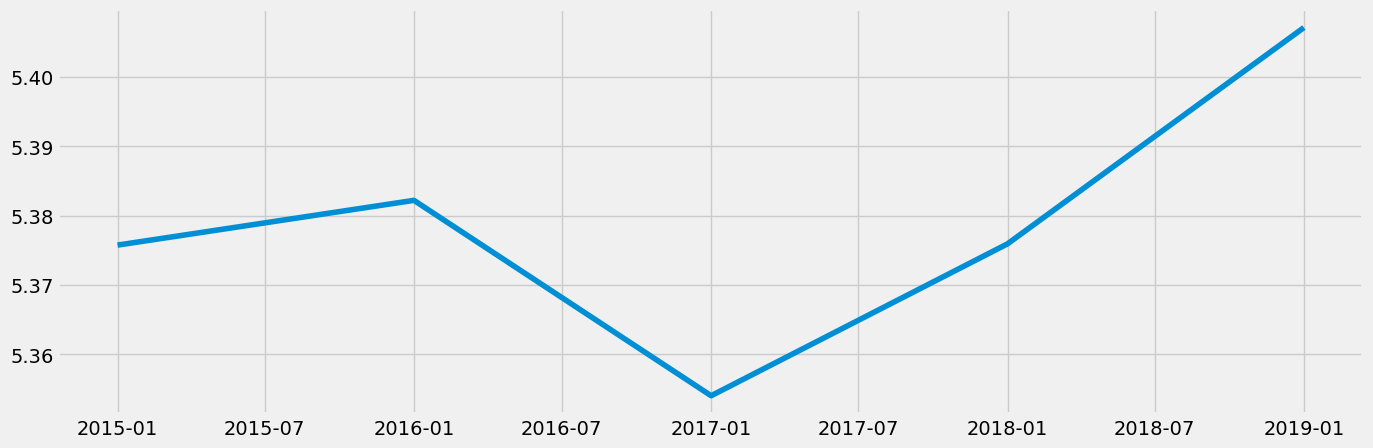

In [30]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_2)

In [31]:
data_2.head()

,happiness_score
,mean
year,
2015-01-01,5.375734
2016-01-01,5.382185
2017-01-01,5.354019
2018-01-01,5.375917
2019-01-01,5.407096


In [36]:
data_2.columns

MultiIndex([('happiness_score', 'mean')],
           )

## Time-series analysis: decomposition

In [33]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_2, model='additive')

In [34]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

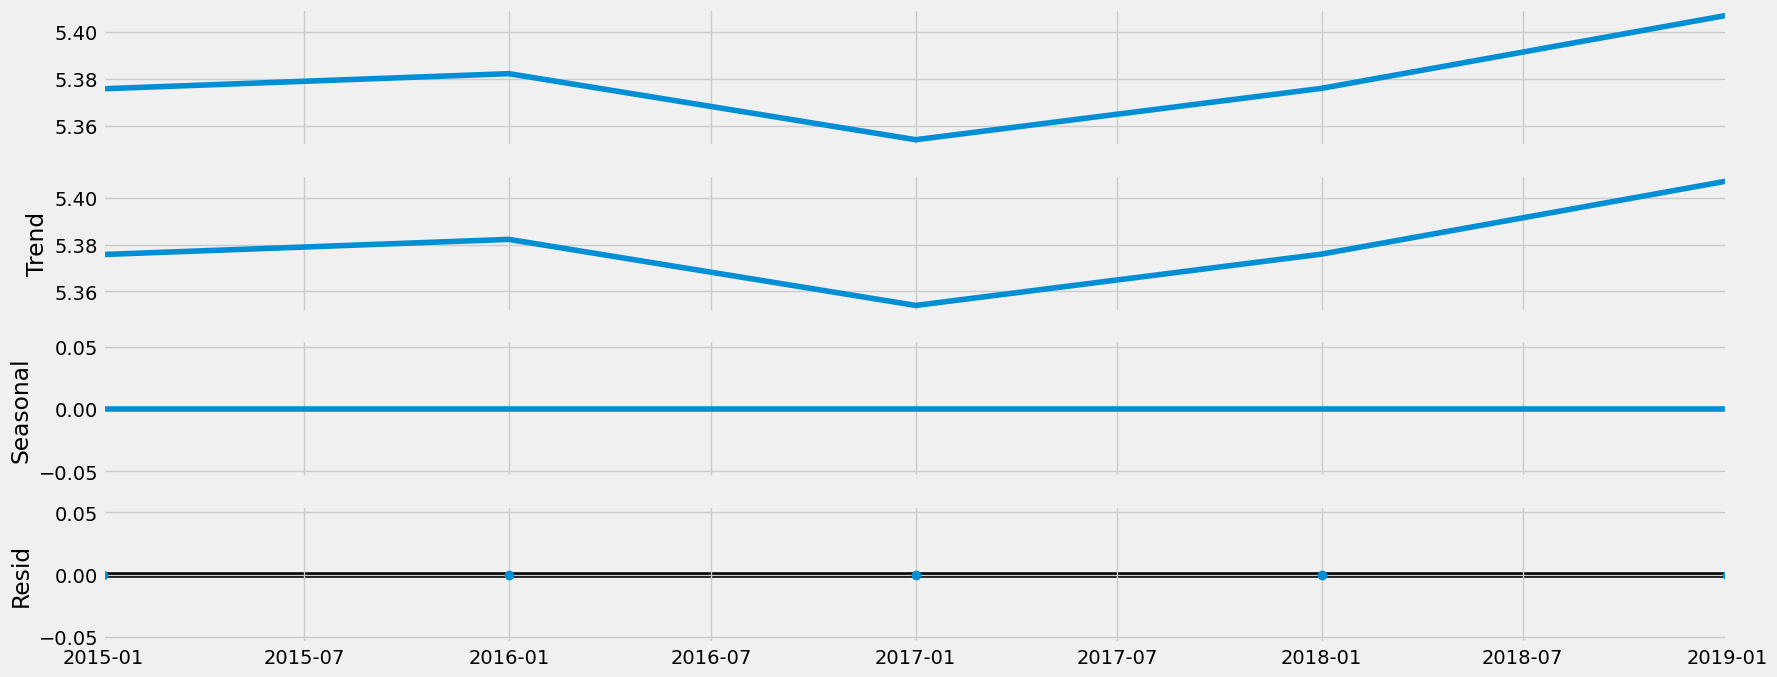

In [35]:
# Plot the separate components

decomposition.plot()
plt.show()

##  Testing for stationarity

In [37]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data_2[('happiness_score', 'mean')])

Dickey-Fuller Stationarity test:
Test Statistic                -0.937653
p-value                        0.775320
Number of Lags Used            0.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


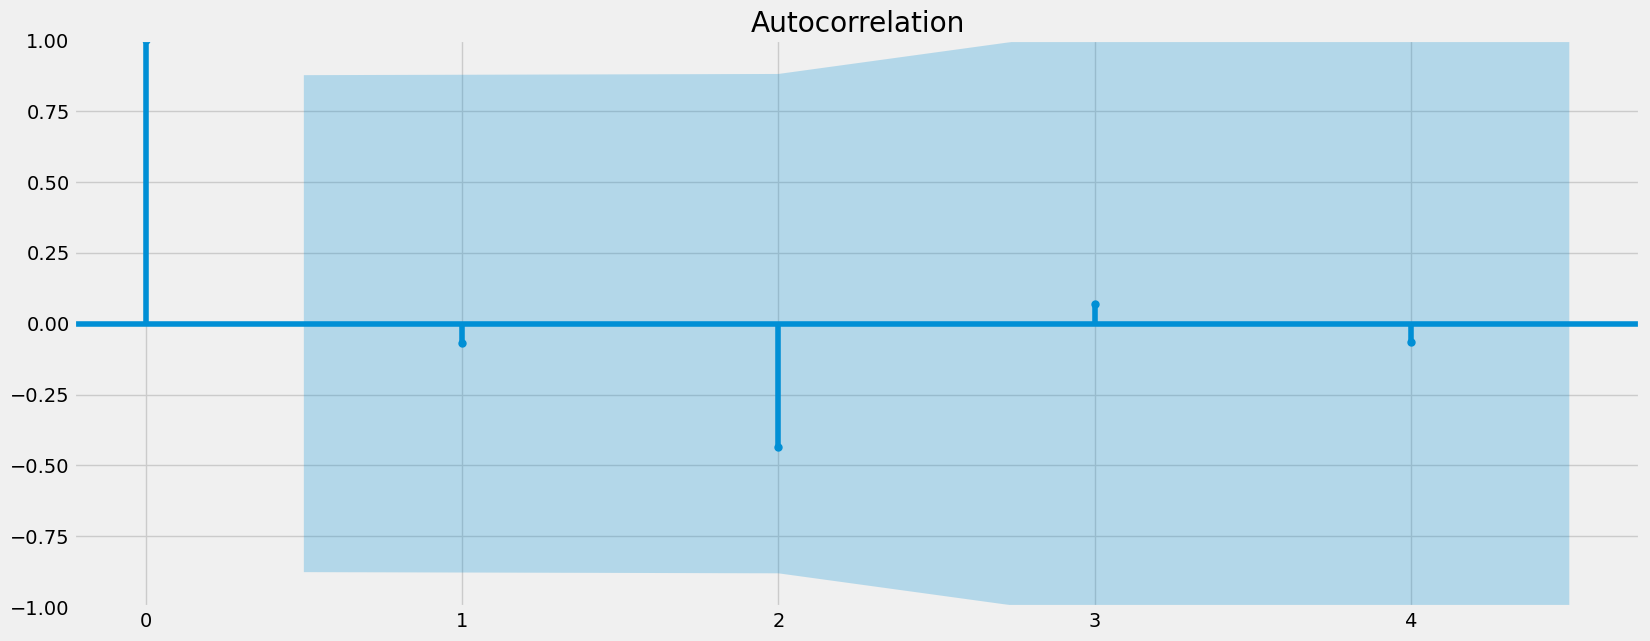

In [38]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_2)
plt.show()

### The aggregated yearly mean of happiness scores from the World Happiness Report dataset does not appear to be stationary according to the Dickey-Fuller test. Further analysis or transformations may be considered to achieve stationarity.

## Stationarizing the World Happiness Score Data

In [40]:
data_diff = data_2 - data_2.shift(1)

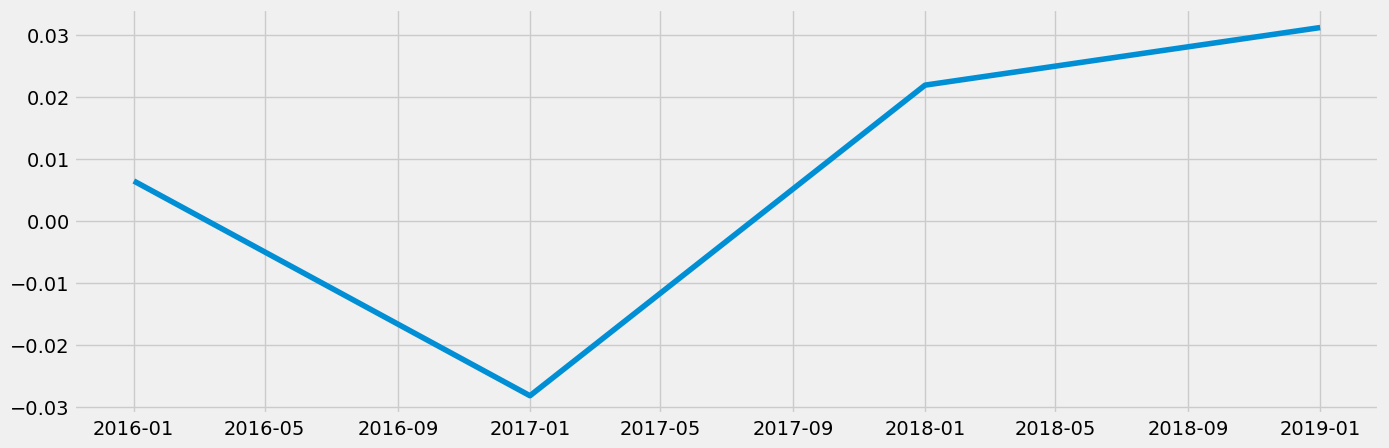

In [41]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [44]:
data_diff.dropna(inplace = True)

In [47]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -0.876918
p-value                         0.795478
Number of Lags Used             0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


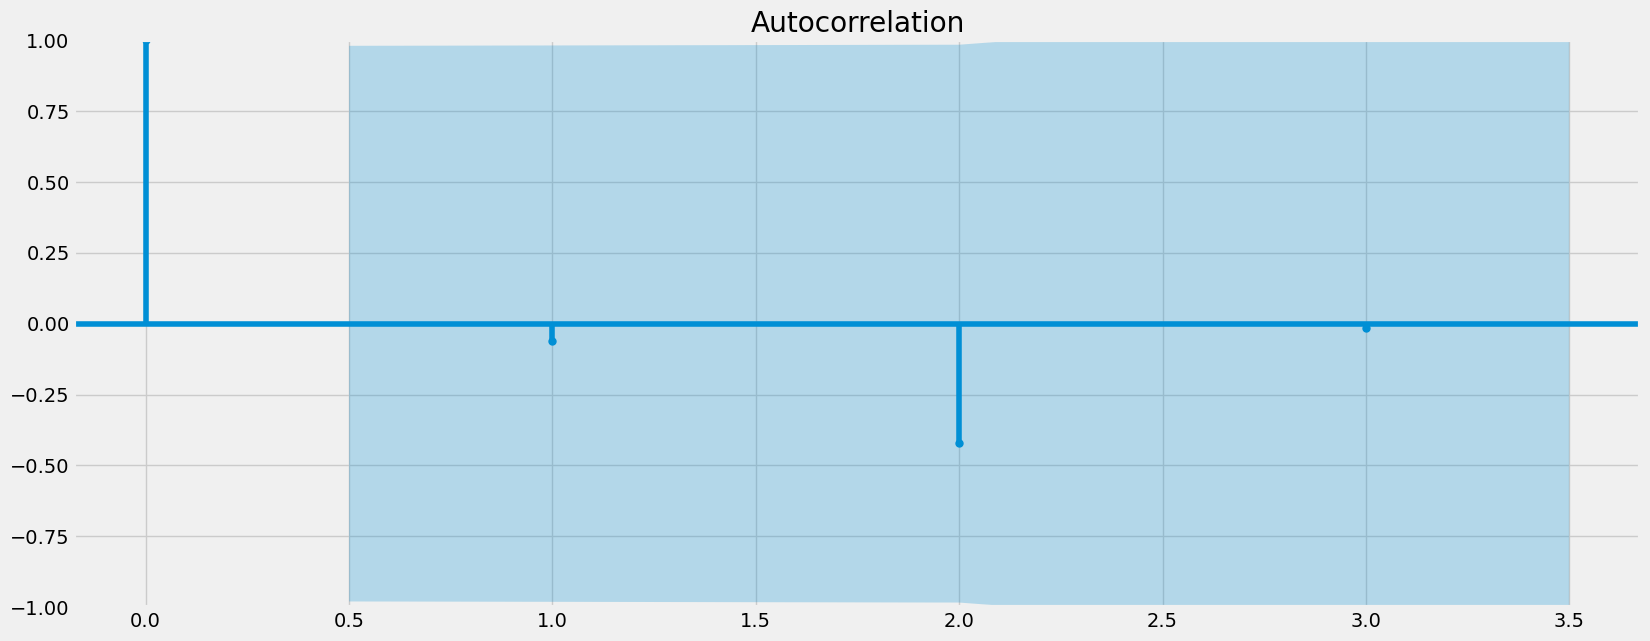

In [46]:
plot_acf(data_diff)
plt.show()

### The results of the Dickey-Fuller test on the differenced series still suggest that the data is not stationary. It's possible that additional transformations or differencing may be needed to achieve stationarity, or there may be inherent non-stationary components in the data that persist even after differencing.

